# EDA  On 200000 Jeopardy Questions 

*The Dataset is taken form Kaggle which contains the information of 2 lakh  Jeopardy questions of Diff value asked on diff shows and different dates*
<hr/>
<b>The dataset contains the following features</b>
<ol>
    <li>Show Number-The published show Number</li>
    <li>Air Date	-The Date of the show</li>
    <li>Round-Jeopardy or Double jeopardy or Final</li>
    <li>Category-Category of the question asked</li>
    <li>Value-Value of the question (200$,400$,800$.......$) </li>
    <li>Question-asked question during the round</li>
    <li>Answer-Answer given by the contestant </li>
    
 </ol>
    


In [1]:
#Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the Dataset
df=pd.read_csv('JEOPARDY_CSV.csv')

In [3]:
#Showing fhe First five columns of the dataset
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [4]:
#Getting the shape of the dataset
df.shape

(216930, 7)

<p>This dataset contains 216930 questions</p>

In [5]:
#getting Dtatypes of the Features
df.dtypes

Show Number     int64
 Air Date      object
 Round         object
 Category      object
 Value         object
 Question      object
 Answer        object
dtype: object

In [6]:
#getting Null value Rows
df.isnull().sum()

Show Number    0
 Air Date      0
 Round         0
 Category      0
 Value         0
 Question      0
 Answer        2
dtype: int64

In [7]:
#Getting Column Names
df.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [8]:
#Renaming columns For Convinient use
df.rename(columns={'Show Number':'show_no',
                   ' Air Date':'air_date',' Round':'round',
                   ' Category':'category',' Value':'value',
                   'Question':'question',' Answer':'answer'},inplace=True)

In [9]:
#filling Null values of answer with no string .Since We can't guess the Answer
df['answer'].fillna(' ',inplace=True)

In [10]:
#Filling none string with '$0' string since No money is given to that question
value=df['value'].values
for  i in range(len(value)):
    if(value[i]=='None'):
        value[i]='$0'

In [11]:
#converting the data type of the value column to Int type
value=[i.replace(",","") for i in value]
value=[i.replace("$","") for i in value]
value=[int(i) for i in value]
df['value']=value

In [12]:
#coverting String Date To date Type column
df['air_date'] = pd.to_datetime(df['air_date'])

In [13]:
#Getting Unique Values Count of the Columns
columns=df.columns
for col in columns[0:7]:
    print(df[col].value_counts())
    print("======================================================")

2941    62
5332    62
6237    61
1945    61
3562    61
        ..
3656    30
6300    30
2757    30
3022    16
1178    12
Name: show_no, Length: 3640, dtype: int64
1997-05-19    62
2007-11-13    62
2011-11-01    61
1993-02-05    61
2000-02-15    61
              ..
2000-06-26    30
2012-01-27    30
1996-09-03    30
1997-10-21    16
1989-10-18    12
Name: air_date, Length: 3640, dtype: int64
Jeopardy!           107384
Double Jeopardy!    105912
Final Jeopardy!       3631
Tiebreaker               3
Name: round, dtype: int64
BEFORE & AFTER        547
SCIENCE               519
LITERATURE            496
AMERICAN HISTORY      418
POTPOURRI             401
                     ... 
1999 TELEVISION         1
WORDS IN PHYSICS        1
LITERATURE & MUSIC      1
'90s NOTABLES           1
CELEBRITY NAMES         1
Name: category, Length: 27995, dtype: int64
400      42244
800      31860
200      30455
1000     21640
600      20377
         ...  
5401         1
1183         1
1203         1
11600   

<b>Inference</b>
<ol>
<li>3640 Shows was telecasted  in 3640 diff dates.</li>
<li>four rounds are there in the quiz namely Jeopardy!,Double Jeopardy!,Final Jeopardy!,Tiebreaker.</li>
    <li>most repeatred categeory was Before and After</li>
<li>Max Amount  per Question is 11,200 dollars 
    and Min was 200 dollar</li>
    <li>There was no Reapeating Question But Some was Repeating Answers</li>
</ol>
 

# Univariate Analysis

##### Count Plot for round column

Text(0.5, 1.0, 'Number of Questions per round')

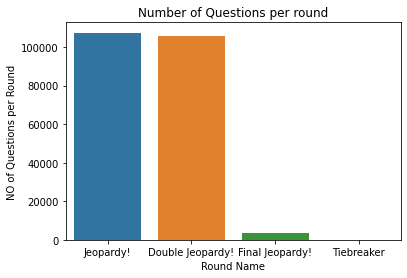

In [14]:
# Number of question asked per round
sns.countplot(x="round",data=df)
plt.xlabel("Round Name")
plt.ylabel("NO of Questions per Round")
plt.title("Number of Questions per round")

<b>Inference</b>
<ul>
    <li>More questions was asked in Jeopardy!(49%) Round followed by Double Jeopardy!(48%) and final Jeopardy!(2%)</li>
    <li>there is a 1% chance of tiebraker</li>
    </ul>

#### Barplot for Value Column

Text(0.5, 1.0, 'Top 10 Valued Qeustions')

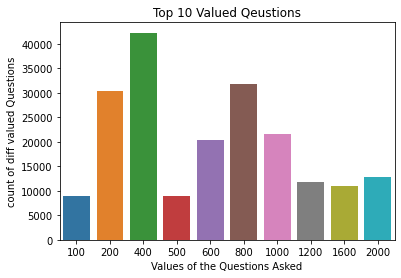

In [15]:
#barplot for the Value column(top 10 Values)
sns.barplot(x=df.value.value_counts()[:10].index,y=df.value.value_counts()[:10].values)
plt.xlabel('Values of the Questions Asked')
plt.ylabel('count of diff valued Questions')
plt.title('Top 10 Valued Qeustions')

**Inference**
* Mostly asked questions was Valued 400$(19%).

### Top Category Questions Asked in the Dataset

<Figure size 7200x7.2e+06 with 0 Axes>

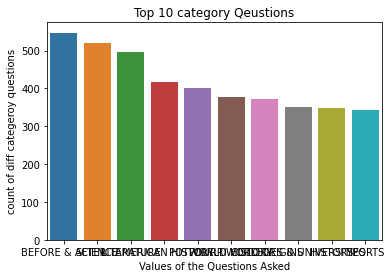

<Figure size 7200x7.2e+06 with 0 Axes>

In [16]:
sns.barplot(x=df.category.value_counts()[:10].index,y=df.category.value_counts()[:10].values)
plt.xlabel('Values of the Questions Asked')
plt.ylabel('count of diff categeroy questions')
plt.title('Top 10 category Qeustions')
plt.figure(figsize=(100, 100000))

**Inference**
* Most Asked Categeory was Before And After



# Bivariate Analysis

In [17]:
#Getting Year wise Analysis
df['year'] = pd. DatetimeIndex(df['air_date']). year

In [18]:
df1=df.groupby('year')

# Scatter Plot for  Value(sum) and year

Text(0.5, 1.0, ' Sum Of Values Vs  year')

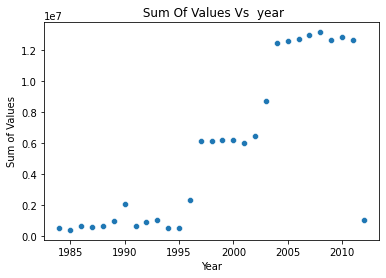

In [19]:
#Scatter plot for Value sum Vs year
sns.scatterplot(x=df1['value'].sum().index,y=df1['value'].sum().values)
plt.xlabel('Year')
plt.ylabel('Sum of Values')
plt.title(' Sum Of Values Vs  year')

**Inference**
* Increasing trend in the Sum of the values as the year progresses

# Pre Processing

In [20]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import contractions

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gorla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gorla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gorla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gorla\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [22]:
#Removing digits and fixing contracitons
import re
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    contractions.fix(text)
    text = re.sub(pattern, '', text)
    return text

In [23]:
#Stop words removal Function
stop_words = nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    
    text = ' '.join(filtered_tokens)    
    return text

In [24]:
#Removing Html Tags
import re
from bs4 import BeautifulSoup

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

In [25]:
#lemmatization with pos tagging
from nltk.corpus import wordnet
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def lematization(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    tag_map = {'j': wordnet.ADJ, 'v': wordnet.VERB, 'n': wordnet.NOUN, 'r': wordnet.ADV}
    new_tagged_tokens = [(word, tag_map.get(tag[0].lower(), wordnet.NOUN))
                            for word, tag in tagged_tokens]
    lemmatized_text = ' '.join(wnl.lemmatize(word, tag) for word, tag in new_tagged_tokens)
    return  lemmatized_text


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gorla\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
#Html tag removing ,Fixing contracitins and Removing special Charecters And digits
que=df[' Question'].tolist()
print(que[466])
for i in range(len(que)):
    text=strip_html_tags(que[i])
    que[i]=text
for i in range(len(que)):
    text=remove_special_characters(que[i],remove_digits=True)
    que[i]=text
for i in range(len(que)):
    text=remove_stopwords(que[i],is_lower_case=False)
    que[i]=text
for i in range(len(que)):
    text=lematization(que[i])
    que[i]=text

C:\Users\gorla\anaconda3\envs\tf\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


(<a href="http://www.j-archive.com/media/2010-12-07_DJ_09.jpg" target="_blank">Dr. Oz presents the clue.</a>) By surgically interrupting the electrical impulses that are causing an abnormal rhythm, the maze procedure is designed to threat this type of heart arrhythmia abbreviated "A.F."


In [27]:
que[466]

'Dr Oz present clue surgically interrupt electrical impulse cause abnormal rhythm maze procedure design threat type heart arrhythmia abbreviate AF'

In [28]:
df["questions"]=que

In [47]:
df

,category,value,answer,year,questions,round_Double Jeopardy!,round_Final Jeopardy!,round_Jeopardy!,round_Tiebreaker
0,HISTORY,200,Copernicus,2004,last year life Galileo house arrest espouse ma...,0,0,1,0
1,ESPN's TOP 10 ALL-TIME ATHLETES,200,Jim Thorpe,2004,Olympian football star Carlisle Indian School ...,0,0,1,0
2,EVERYBODY TALKS ABOUT IT...,200,Arizona,2004,city Yuma state record average hour sunshine year,0,0,1,0
3,THE COMPANY LINE,200,McDonald's,2004,live Art Linkletter Show company serve billion...,0,0,1,0
4,EPITAPHS & TRIBUTES,200,John Adams,2004,Signer Dec Indep framer Constitution Mass seco...,0,0,1,0
...,...,...,...,...,...,...,...,...,...
216925,RIDDLE ME THIS,2000,Turandot,2006,Puccini opera turn solution riddle pose heroine,1,0,0,0
216926,"""T"" BIRDS",2000,a titmouse,2006,North America term properly apply specie crest...,1,0,0,0
216927,AUTHORS IN THEIR YOUTH,2000,Clive Barker,2006,Penny Lane Hellraiser grow barber shave anothe...,1,0,0,0
216928,QUOTATIONS,2000,Geronimo,2006,Ft Sill Okla make plea Arizona land home fathe...,1,0,0,0
